In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("bill_authentication.csv")

In [5]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [8]:
df.shape

(1372, 5)

In [9]:
df1=df

<AxesSubplot:xlabel='Class', ylabel='count'>

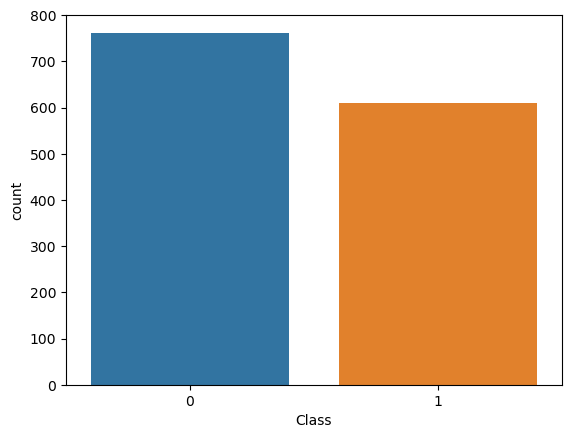

In [10]:
sns.countplot(df1['Class'])

In [11]:
df1.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [13]:
df1.dtypes

Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object

In [14]:
a=df1.corr()

In [15]:
a

,Variance,Skewness,Curtosis,Entropy,Class
Variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
Skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
Curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
Entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
Class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.preprocessing import MinMaxScaler


In [19]:
scale=MinMaxScaler()


In [20]:
cols=list(df1.columns)

In [21]:
cols

['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

In [22]:
df1[cols]=scale.fit_transform(df1[cols])

In [23]:
df1

,Variance,Skewness,Curtosis,Entropy,Class
0,0.769004,0.839643,0.106783,0.736628,0.0
1,0.835659,0.820982,0.121804,0.644326,0.0
2,0.786629,0.416648,0.310608,0.786951,0.0
3,0.757105,0.871699,0.054921,0.450440,0.0
4,0.531578,0.348662,0.424662,0.687362,0.0
...,...,...,...,...,...
1367,0.537124,0.565855,0.165249,0.726398,1.0
1368,0.407690,0.332868,0.506753,0.808350,1.0
1369,0.237385,0.011768,0.985603,0.524755,1.0
1370,0.250842,0.201701,0.761587,0.660675,1.0


In [24]:
y=df1.pop('Class')

In [25]:
df1

,Variance,Skewness,Curtosis,Entropy
0,0.769004,0.839643,0.106783,0.736628
1,0.835659,0.820982,0.121804,0.644326
2,0.786629,0.416648,0.310608,0.786951
3,0.757105,0.871699,0.054921,0.450440
4,0.531578,0.348662,0.424662,0.687362
...,...,...,...,...
1367,0.537124,0.565855,0.165249,0.726398
1368,0.407690,0.332868,0.506753,0.808350
1369,0.237385,0.011768,0.985603,0.524755
1370,0.250842,0.201701,0.761587,0.660675


In [26]:
x=df1

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=9)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [29]:
model=DecisionTreeClassifier(criterion='gini',max_depth=5)#applying no of branches and gini critetion for decision tree...

In [30]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [31]:
y_pred=model.predict(x_test)

In [32]:
y_pred

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 1.

In [33]:
y_pred_train=model.predict(x_train)

In [34]:
print("accuracy score for train data ",accuracy_score(y_pred_train,y_train))

accuracy score for train data  0.9873663751214772


In [35]:
print("accuracy score for test data ", accuracy_score(y_pred,y_test))

accuracy score for test data  0.967930029154519


In [36]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       191
         1.0       0.94      0.99      0.96       152

    accuracy                           0.97       343
   macro avg       0.97      0.97      0.97       343
weighted avg       0.97      0.97      0.97       343



In [37]:
print(confusion_matrix(y_pred,y_test))

[[182   9]
 [  2 150]]


In [38]:
#now building decision tree with hyperparameter tuning...

In [41]:
from sklearn.model_selection import GridSearchCV,KFold

In [42]:
criterion=['gini','entropy']
max_depth=[1,3,5,7]
min_samples_split=[1,3,5,7]
min_samples_leaf=[1,3,5,7]
param={'max_depth':max_depth,
      'criterion':criterion,
      'min_samples_split':min_samples_split,
      'min_samples_leaf':min_samples_leaf}

In [43]:
grid=GridSearchCV(DecisionTreeClassifier(),param,n_jobs=-1,cv=3,verbose=100)

In [45]:
grid.fit(x_train,y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [1, 3, 5, 7]},
             verbose=100)

In [46]:
y_pred_best=grid.predict(x_test)

In [47]:
print(accuracy_score(y_pred_best,y_test))#for test...

0.9795918367346939


In [48]:
y_train_best=grid.predict(x_train)

In [50]:
print(accuracy_score(y_train_best,y_train))#for train...

0.9941690962099126


In [51]:
grid.best_score_

0.9873663751214771

In [53]:
grid.best_params_#following gives best parameters for model decision tree

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [55]:
scores=grid.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002667,0.000471,0.000000,0.000000e+00,gini,1,1,1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",NaN,NaN,NaN,NaN,NaN,128
1,0.002333,0.000471,0.002000,7.786718e-07,gini,1,1,3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.845481,0.851312,0.877551,0.858115,0.013948,73
2,0.003666,0.000472,0.001334,4.712023e-04,gini,1,1,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.845481,0.851312,0.877551,0.858115,0.013948,73
3,0.003487,0.000409,0.001513,4.089792e-04,gini,1,1,7,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.845481,0.851312,0.877551,0.858115,0.013948,73
4,0.002754,0.000348,0.000000,0.000000e+00,gini,1,3,1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",NaN,NaN,NaN,NaN,NaN,103
